# Normality of Financial Returns

In [ ]:
!pip install yfinance

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta


pd.options.display.float_format = '{:.4f}'.format 
plt.style.use("seaborn")


In [6]:
n_years = 5
symbol = "MSFT"
end = datetime.now()
start = end - timedelta(days = n_years * 365)

In [7]:
msft = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [12]:
data = msft.Close.to_frame()
data.describe()

,Close
count,1260.0000
mean,156.5582
std,76.7084
min,62.3000
25%,94.4250
50%,136.0600
75%,213.7325
max,343.1100


In [13]:
data.head()

,Close
Date,
2017-01-17,62.5300
2017-01-18,62.5000
2017-01-19,62.3000
2017-01-20,62.7400
2017-01-23,62.9600


## 01. Log Returns

In [14]:
data['log_returns'] = np.log(data.Close / data.Close.shift())
data.head()

,Close,log_returns
Date,,
2017-01-17,62.5300,nan
2017-01-18,62.5000,-0.0005
2017-01-19,62.3000,-0.0032
2017-01-20,62.7400,0.0070
2017-01-23,62.9600,0.0035


In [15]:
data.describe()

,Close,log_returns
count,1260.0000,1259.0000
mean,156.5582,0.0013
std,76.7084,0.0174
min,62.3000,-0.1595
25%,94.4250,-0.0058
50%,136.0600,0.0014
75%,213.7325,0.0100
max,343.1100,0.1329


## 02. Histogram

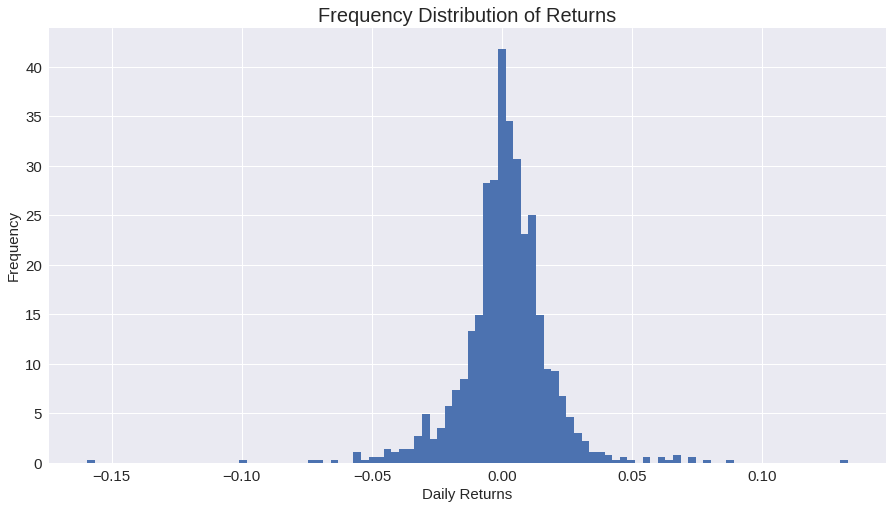

In [20]:
data.log_returns.plot(kind = "hist",figsize = (15,8),bins = 100,fontsize = 15,density = True)
plt.xlabel("Daily Returns",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title('Frequency Distribution of Returns',fontsize = 20)
plt.show()

## 03. Normal Distribution

A normaly distributed Random Variable can be fully described by its

* mean
* standard deviation

### Higher Central Moments are ZERO

* **Skew** measures symmetrie around mean
* **Kurtosis**(Excess) Positive kurtosis $→$ more observations in the tails


In [21]:
mu = data.log_returns.mean()
sigma = data.log_returns.std()

In [22]:
import scipy.stats as stats

In [23]:
stats.skew(data.log_returns.dropna())

-0.36562284500267694

In [28]:
stats.kurtosis(data.log_returns.dropna(),fisher=True)

11.287370286244736

### Comparing with a normal distribution

In [30]:
x = np.linspace(data.log_returns.min(),data.log_returns.max(),10000)
y = stats.norm.pdf(x,loc = mu,scale = sigma)

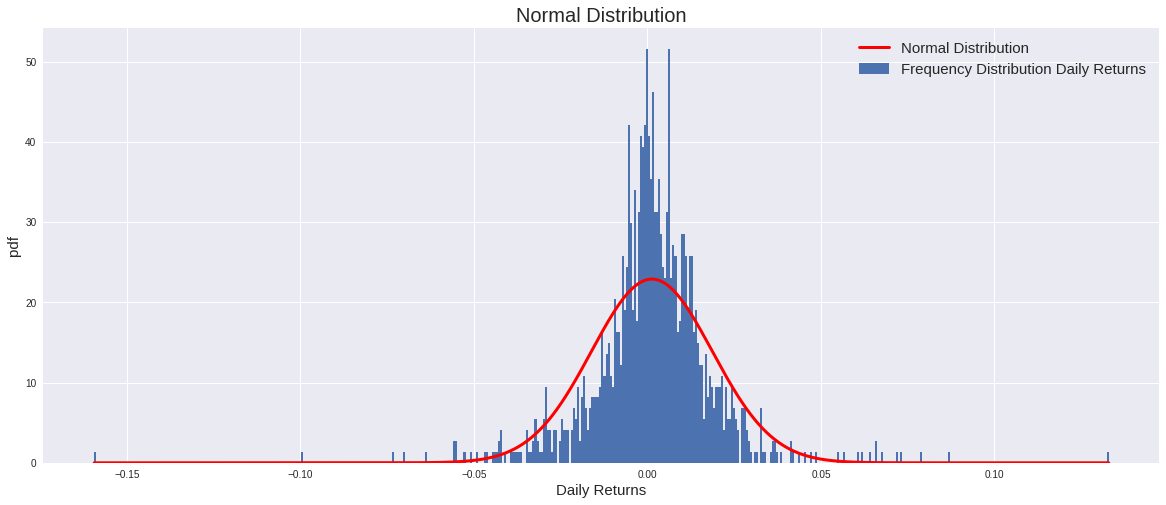

In [34]:
plt.figure(figsize = (20,8))
plt.hist(data.log_returns,bins = 500,density=True,label = "Frequency Distribution Daily Returns")
plt.plot(x,y,linewidth = 3,color = "red",label = "Normal Distribution")
plt.title("Normal Distribution",fontsize = 20)
plt.xlabel("Daily Returns",fontsize = 15)
plt.ylabel("pdf",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Testing Normality Based on the Sample Data

**Hypothesis Test with H0 Hypothesis**:

MSFT returns (full population) follow a normal distribution

In [36]:
z_stat,p_value = stats.normaltest(data.log_returns.dropna())

In [37]:
#High Values -> reject H0
z_stat

273.8384002857668

In [39]:
#Low VValues (close to zero) -> reject H0

#Assuming the Log Returns come from a Normal Distribution there is 
# (p_value)% that we get these extreme outcomes in a sample
round(p_value,20)

0.0